# 📊 Análise Exploratória de Dados de da Rede Sonda 🌦️

## 📌 Introdução
Este notebook realiza uma análise exploratória dos dados meteorológicos coletados de diversas estações. O objetivo é entender a estrutura dos dados, avaliar sua qualidade e identificar padrões relevantes.

## 📂 Fonte dos Dados
- Arquivos CSV formatados armazenados no ftp
- Contêm medições de variáveis meteorológicas, solarimétricas e anemométricas

## 🔍 Objetivos da Análise
1. Analise do tamanho dos dados
2. Verificação do mapa geral de dados
3. Verificação de dados faltantes
4. Análise estatística descritiva

### 1. Tamanho dos Dados
Vamos começar listando o tamanho da base de dados que estão no diretório do ftp.

In [1]:
# Diretório onde os arquivos estão localizados
DIRETORIO = '/media/helvecioneto/Barracuda/sonda/'

In [2]:
# Exibe o tamanho de cada arquivo no diretório ordenado por tamanho de forma decrescente
!du -h --max-depth=1 {"/media/helvecioneto/Barracuda/sonda-formatados/"} | sort -rh

16G	/media/helvecioneto/Barracuda/sonda-formatados/
1,6G	/media/helvecioneto/Barracuda/sonda-formatados/PTR
1,5G	/media/helvecioneto/Barracuda/sonda-formatados/PMA
1,3G	/media/helvecioneto/Barracuda/sonda-formatados/SMS
1,2G	/media/helvecioneto/Barracuda/sonda-formatados/CPA
1,2G	/media/helvecioneto/Barracuda/sonda-formatados/BRB
989M	/media/helvecioneto/Barracuda/sonda-formatados/FLN
799M	/media/helvecioneto/Barracuda/sonda-formatados/ORN
776M	/media/helvecioneto/Barracuda/sonda-formatados/CGR
759M	/media/helvecioneto/Barracuda/sonda-formatados/JOI
720M	/media/helvecioneto/Barracuda/sonda-formatados/NAT
686M	/media/helvecioneto/Barracuda/sonda-formatados/SLZ
472M	/media/helvecioneto/Barracuda/sonda-formatados/CTS
464M	/media/helvecioneto/Barracuda/sonda-formatados/SBR
413M	/media/helvecioneto/Barracuda/sonda-formatados/TMA
374M	/media/helvecioneto/Barracuda/sonda-formatados/STM
365M	/media/helvecioneto/Barracuda/sonda-formatados/MCL
325M	/media/helvecioneto/Barracuda/sonda-formatados/

### 2. Tamanho dos Dados

Existem 3 tipos de dados:
- Dados Meteorológicos
- Dados Solarimétricos
- Dados Anemometricos

Utilizaremos a biblioteca duckdb para realizar a análise dos dados. DuckDB funciona como um banco de dados SQL, mas em memória, o que facilita a análise de grandes volumes de dados.

In [33]:
# Importar a biblioteca DuckDB para manipulação de dados
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from matplotlib.gridspec import GridSpec
warnings.filterwarnings('ignore')

In [4]:
# Apontar o caminho das bases de dados
ARQV_METEOROLOGICO = DIRETORIO + 'dados_meteorologicos.parquet'
ARQV_SOLARIMETRICA = DIRETORIO + 'dados_solarimetricos.parquet'
ARQV_ANEMOMETRICO = DIRETORIO + 'dados_anemometricos.parquet'

# Nome das tabelas
BASE_METEOROLOGICO = 'base_meteorologica'
BASE_SOLARIMETRICA = 'base_solarimetrica'
BASE_ANEMOMETRICO = 'base_anemometrica'

In [5]:
# Cria variavel para conexão do banco de dados
global con
con = duckdb.connect(database=':memory:')
!rm -rf .tmp

In [6]:
# Cria as tabelas no banco de dados DuckDB a partir dos arquivos Parquet
con.execute(f"""CREATE TABLE IF NOT EXISTS {BASE_METEOROLOGICO} AS \
            SELECT * FROM read_parquet('{ARQV_METEOROLOGICO}')""")

con.execute(f"""CREATE TABLE IF NOT EXISTS {BASE_SOLARIMETRICA} AS \
            SELECT * FROM read_parquet('{ARQV_SOLARIMETRICA}')""")

con.execute(f"""CREATE TABLE IF NOT EXISTS {BASE_ANEMOMETRICO} AS \
            SELECT * FROM read_parquet('{ARQV_ANEMOMETRICO}')""")

In [18]:
# Exibe as primeiras linhas da tabela meteorológica
display(con.execute(f"SELECT * FROM {BASE_METEOROLOGICO} LIMIT 5").fetch_df())

,acronym,timestamp,year,day,min,tp_sfc,humid_sfc,press,rain,ws10_avg,ws10_std,wd10_avg,wd10_std
0,FLN,2019-03-01 00:00:00,2019,60,0,22.379999,97.699997,1010.283997,0.72,5.2698,0.923294,23.422167,4.079195
1,FLN,2019-03-01 00:10:00,2019,60,10,21.219999,101.099998,1010.502991,0.00,4.6318,0.352908,29.199734,1.963143
2,FLN,2019-03-01 00:20:00,2019,60,20,21.150000,101.099998,1010.476013,0.18,3.9738,0.713510,33.528019,2.825004
3,FLN,2019-03-01 00:30:00,2019,60,30,21.080000,101.099998,1010.473999,0.00,3.1440,0.646525,22.548946,3.690781
4,FLN,2019-03-01 00:40:00,2019,60,40,21.200001,101.099998,1010.629028,0.00,0.8769,0.440114,58.076206,8.977480


In [19]:
# Exibe as primeiras linhas da tabela anemométrica
display(con.execute(f"SELECT * FROM {BASE_SOLARIMETRICA} LIMIT 5").fetch_df())

,acronym,timestamp,year,day,min,glo_avg,glo_std,glo_max,glo_min,dif_avg,...,lw_calc_min,lw_raw_avg,lw_raw_std,lw_raw_max,lw_raw_min,tp_glo,tp_dir,tp_dif,tp_lw_dome,tp_lw_case
0,FLN,2019-04-01 00:00:00,2019,91,0,-1.786,0.135,-1.397,-2.196,-2.651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FLN,2019-04-01 00:01:00,2019,91,1,-1.808,0.124,-1.397,-2.196,-2.647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FLN,2019-04-01 00:02:00,2019,91,2,-1.815,0.145,-1.397,-2.196,-2.647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FLN,2019-04-01 00:03:00,2019,91,3,-1.800,0.136,-1.397,-2.196,-2.647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FLN,2019-04-01 00:04:00,2019,91,4,-1.797,0.163,-1.397,-2.196,-2.666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Exibe as primeiras linhas da tabela solarimétrica
display(con.execute(f"SELECT * FROM {BASE_ANEMOMETRICO} LIMIT 5").fetch_df())

,acronym,timestamp,year,day,min,ws10_avg,ws10_std,ws10_min,ws10_max,wd10_avg,...,wd25_avg,wd25_std,tp_25,ws50_avg,ws50_std,ws50_min,ws50_max,wd50_avg,wd50_std,tp_50
0,ORN,2021-01-01 00:00:00,2021,1,0,3.036001,0.692576,1.43,4.90,340.277008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ORN,2021-01-01 00:10:00,2021,1,10,3.063534,0.634577,1.85,4.74,342.141602,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ORN,2021-01-01 00:20:00,2021,1,20,3.067666,0.664677,1.74,4.78,347.539215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ORN,2021-01-01 00:30:00,2021,1,30,2.389133,0.479149,1.13,3.98,351.191895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ORN,2021-01-01 00:40:00,2021,1,40,2.308198,0.641427,0.97,4.39,338.063690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def verifica_temporal(base):
    # Faz um agrupamento por acronym e timestamp para verificar se os dados são temporais, fazendo a contagem de registros por dia
    query = f"""
    SELECT acronym, DATE_TRUNC('year', timestamp) AS data, COUNT(*) AS registros
    FROM {base}
    GROUP BY acronym, data
    ORDER BY data
    """
    return con.execute(query).fetch_df()

In [8]:
# Verifica se os dados são temporais
temporal_solar = verifica_temporal(BASE_SOLARIMETRICA)
temporal_anemo = verifica_temporal(BASE_ANEMOMETRICO)
temporal_meteo = verifica_temporal(BASE_METEOROLOGICO)

In [9]:
def plot_tempora(df, titulo):
    df["year"] = df["data"].dt.year
    df["month"] = df["data"].dt.month
    df = df.dropna(subset=["year"])
    df["year"] = df["year"].astype(int)
    # Reagrupando os dados para evitar duplicatas ao pivotar
    df_grouped = df.groupby(["acronym", "year"])["registros"].sum().reset_index()
    # Criando a matriz pivot corrigida
    heatmap_data = df_grouped.pivot(index="acronym", columns="year", values="registros")
    # Criando a figura
    plt.figure(figsize=(8, max(4, len(heatmap_data) * 0.2)))  # Ajusta dinamicamente o tamanho
    sns.heatmap(heatmap_data, cmap="coolwarm_r", linewidths=0.5, linecolor="gray", 
                cbar_kws={'label': 'Número de Registros'}, annot=False)
    # Ajustando o gráfico
    plt.title(titulo)
    plt.xlabel("Ano")
    plt.ylabel("Estação")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

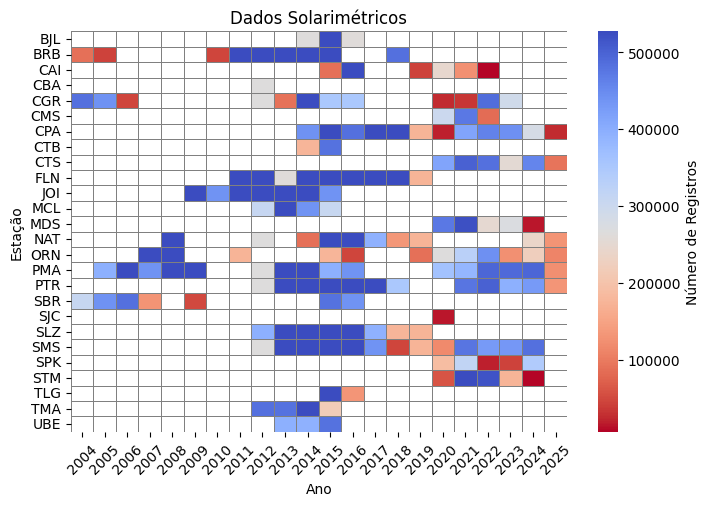

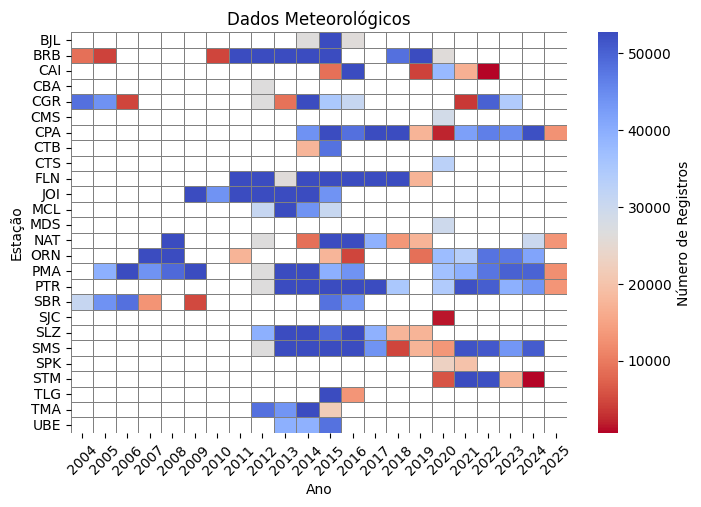

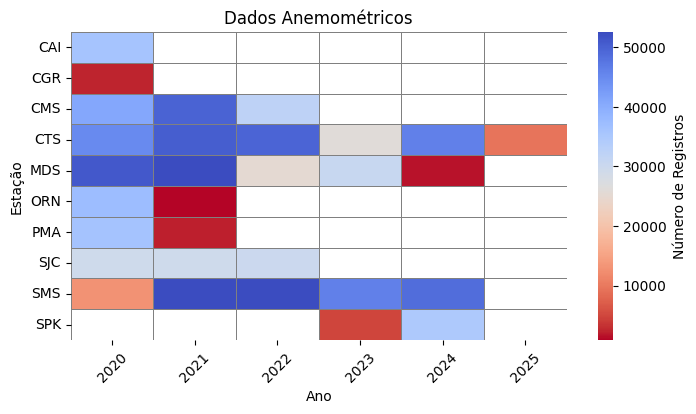

In [10]:
plot_tempora(temporal_solar, 'Dados Solarimétricos')
plot_tempora(temporal_meteo, 'Dados Meteorológicos')
plot_tempora(temporal_anemo, 'Dados Anemométricos')

In [11]:
# Pega apenas colunas de dados meteorológicos
colunas_meteoro = con.execute(f"SELECT * FROM {BASE_METEOROLOGICO} LIMIT 1").description
colunas_meteoro = [c[0] for c in colunas_meteoro[5:]]
print(f"Colunas de dados meteorológicos: {colunas_meteoro}")

# Pega apenas colunas de dados solarimétricos
colunas_solar = con.execute(f"SELECT * FROM {BASE_SOLARIMETRICA} LIMIT 1").description
colunas_solar = [c[0] for c in colunas_solar[5:]]
print(f"Colunas de dados solarimétricos: {colunas_solar}")

# Pega apenas colunas de dados anemométricos
colunas_anemo = con.execute(f"SELECT * FROM {BASE_ANEMOMETRICO} LIMIT 1").description
colunas_anemo = [c[0] for c in colunas_anemo[5:]]
print(f"Colunas de dados anemométricos: {colunas_anemo}")

Colunas de dados meteorológicos: ['tp_sfc', 'humid_sfc', 'press', 'rain', 'ws10_avg', 'ws10_std', 'wd10_avg', 'wd10_std']
Colunas de dados solarimétricos: ['glo_avg', 'glo_std', 'glo_max', 'glo_min', 'dif_avg', 'dif_std', 'dif_max', 'dif_min', 'par_avg', 'par_std', 'par_max', 'par_min', 'lux_avg', 'lux_std', 'lux_max', 'lux_min', 'dir_avg', 'dir_std', 'dir_max', 'dir_min', 'lw_calc_avg', 'lw_calc_std', 'lw_calc_max', 'lw_calc_min', 'lw_raw_avg', 'lw_raw_std', 'lw_raw_max', 'lw_raw_min', 'tp_glo', 'tp_dir', 'tp_dif', 'tp_lw_dome', 'tp_lw_case']
Colunas de dados anemométricos: ['ws10_avg', 'ws10_std', 'ws10_min', 'ws10_max', 'wd10_avg', 'wd10_std', 'ws25_avg', 'ws25_std', 'ws25_min', 'ws25_max', 'wd25_avg', 'wd25_std', 'tp_25', 'ws50_avg', 'ws50_std', 'ws50_min', 'ws50_max', 'wd50_avg', 'wd50_std', 'tp_50']


### 3. Verificação de dados faltantes

In [12]:
def verificar_dados_invalidos(base, colunas): 
    query = f"""
    SELECT acronym, COUNT(*) AS total_dados,
    """
    # Para cada coluna em colunas, criamos a parte do "dados_invalidos"
    for i, coluna in enumerate(colunas):
        query += f"""
        SUM(CASE WHEN \"{coluna}\" = 3333.0 OR \"{coluna}\" = -5555.0 OR \"{coluna}\" IS NULL THEN 1 ELSE 0 END) AS {coluna},
        """
    # Remover a última vírgula da consulta
    query = query.rstrip(",\n")
    # Adiciona a parte do FROM e GROUP BY
    query += f"""
    FROM \"{base}\"
    GROUP BY acronym
    """
    # Executar a query
    df = con.execute(query).fetch_df()
    return df


In [13]:
# Verifica dados inválidos na base meteorológica
invalidos_meteoro = verificar_dados_invalidos(BASE_METEOROLOGICO, colunas_meteoro)
# Verifica dados inválidos na base solarimétrica
invalidos_solar = verificar_dados_invalidos(BASE_SOLARIMETRICA, colunas_solar)
# Verifica dados inválidos na base anemométrica
invalidos_anemo = verificar_dados_invalidos(BASE_ANEMOMETRICO, colunas_anemo)

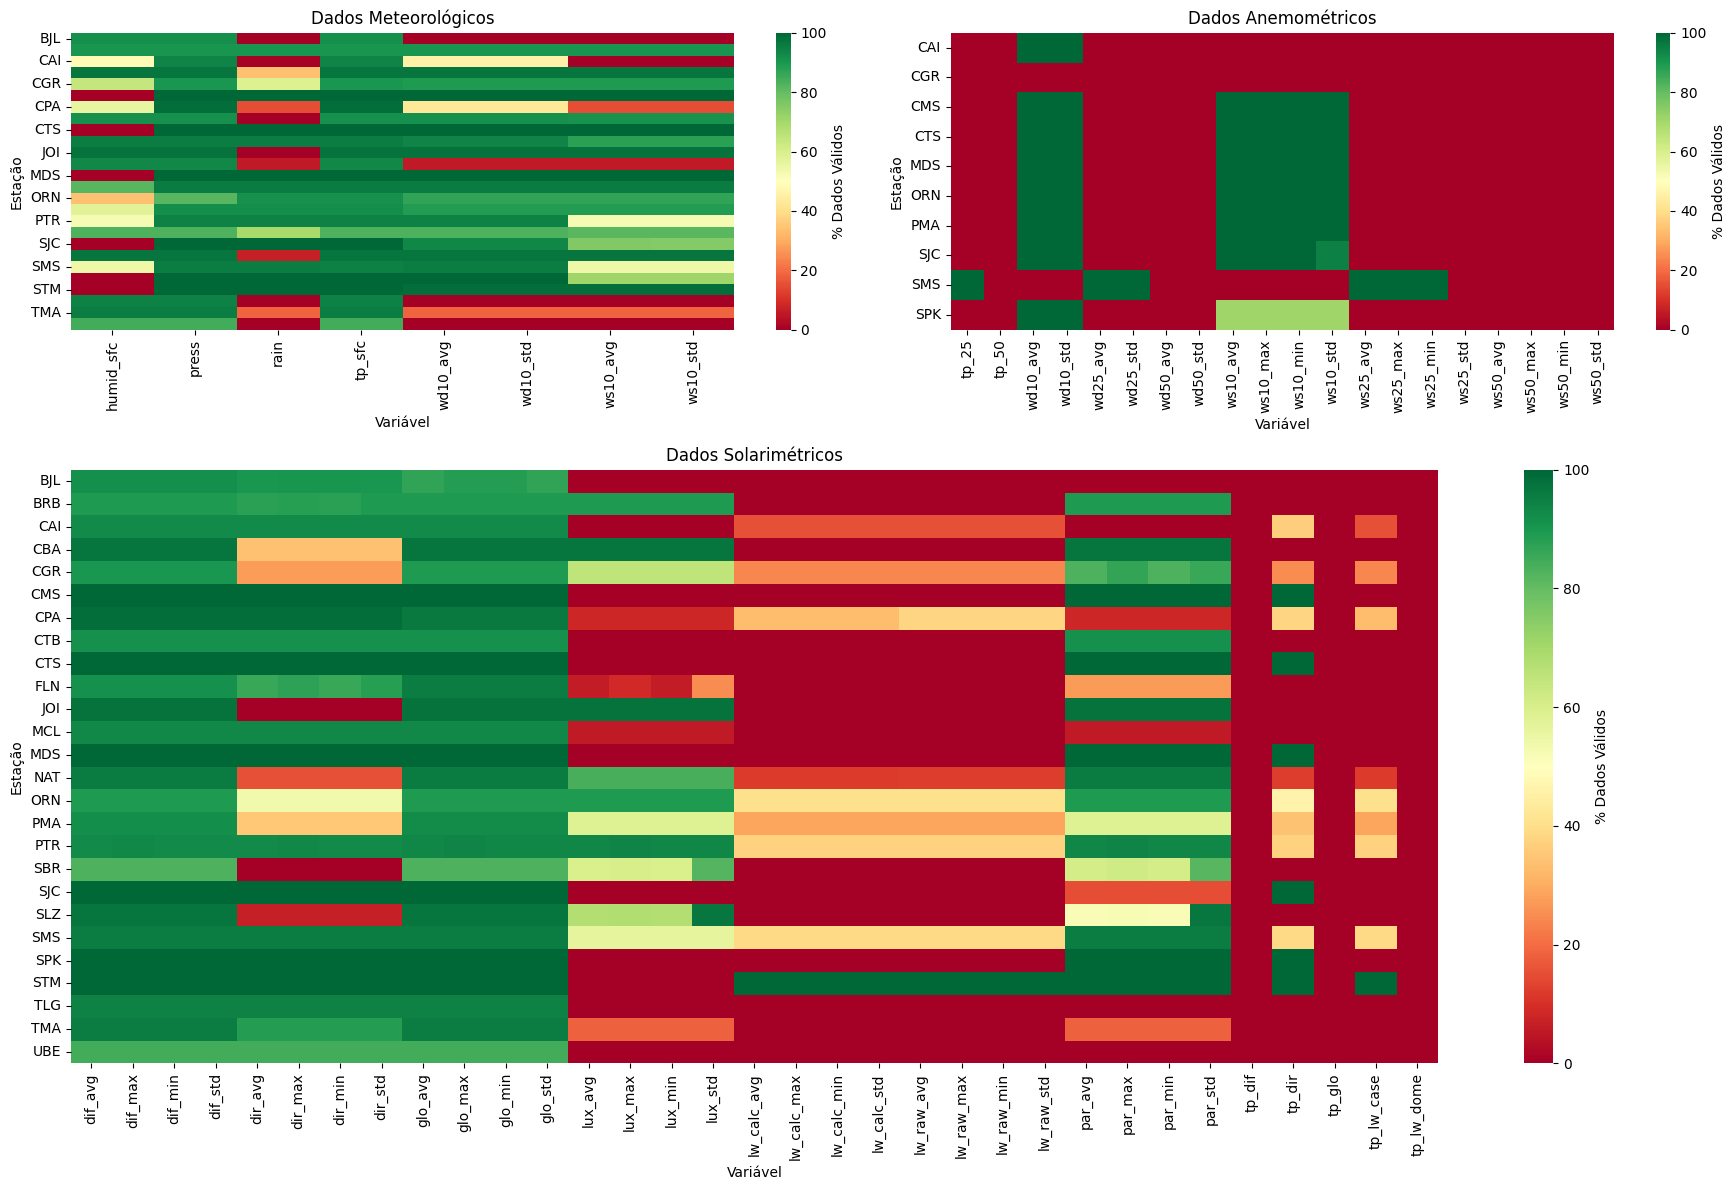

In [14]:
def visualizar_completude_reformulado(df_invalidos_meteoro, df_invalidos_anemo, df_invalidos_solar, titulos):
    fig = plt.figure(figsize=(18, 12))
    gs = GridSpec(2, 2, figure=fig, height_ratios=[1, 2])

    # Subplots superiores (dados meteorológicos e anemométricos)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    # Subplot inferior (dados solarimétricos)
    ax3 = fig.add_subplot(gs[1, :])  # ocupa ambas as colunas da linha de baixo

    for ax, df_invalidos, titulo in zip([ax1, ax2], [df_invalidos_meteoro, df_invalidos_anemo], titulos[:2]):
        porcentagem_validos = df_invalidos.copy()
        for col in porcentagem_validos.columns[2:]:
            porcentagem_validos[col] = 100 - (porcentagem_validos[col] / porcentagem_validos['total_dados'] * 100)

        df_melted = porcentagem_validos.melt(id_vars=['acronym'], 
                                             value_vars=porcentagem_validos.columns[2:],
                                             var_name='variavel', value_name='porcentagem_validos')
        pivot = df_melted.pivot(index='acronym', columns='variavel', values='porcentagem_validos')
        sns.heatmap(pivot, cmap='RdYlGn', vmin=0, vmax=100, annot=False,
                    cbar_kws={'label': '% Dados Válidos'}, ax=ax)
        ax.set_title(titulo)
        ax.set_xlabel('Variável')
        ax.set_ylabel('Estação')
        ax.tick_params(axis='x', rotation=90)

    # Plot da parte inferior
    porcentagem_validos = df_invalidos_solar.copy()
    for col in porcentagem_validos.columns[2:]:
        porcentagem_validos[col] = 100 - (porcentagem_validos[col] / porcentagem_validos['total_dados'] * 100)

    df_melted = porcentagem_validos.melt(id_vars=['acronym'], 
                                         value_vars=porcentagem_validos.columns[2:],
                                         var_name='variavel', value_name='porcentagem_validos')
    pivot = df_melted.pivot(index='acronym', columns='variavel', values='porcentagem_validos')
    sns.heatmap(pivot, cmap='RdYlGn', vmin=0, vmax=100, annot=False,
                cbar_kws={'label': '% Dados Válidos'}, ax=ax3)
    ax3.set_title(titulos[2])
    ax3.set_xlabel('Variável')
    ax3.set_ylabel('Estação')
    ax3.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

# Chamando a função reformulada
visualizar_completude_reformulado(invalidos_meteoro, invalidos_anemo, invalidos_solar, 
                                  ['Dados Meteorológicos', 'Dados Anemométricos', 'Dados Solarimétricos'])


### 4. Análise estatística descritiva

In [59]:
def analise_temporal_mensal_multivariada(base, colunas, con):
    n = len(colunas)
    fig, axes = plt.subplots(n, 1, figsize=(14, 1.3 * n), sharex=True)

    if n == 1:
        axes = [axes]

    for ax, coluna in zip(axes, colunas):
        query = f"""
        SELECT 
            DATE_TRUNC('month', timestamp) AS mes,
            AVG(CASE WHEN "{coluna}" != 3333.0 AND "{coluna}" != -5555.0 THEN "{coluna}" END) AS valor_medio
        FROM "{base}"
        GROUP BY mes
        ORDER BY mes
        """
        dados = con.execute(query).fetch_df()

        ax.plot(dados['mes'], dados['valor_medio'], 'o-', label=coluna)
        ax.set_title(f'Média Mensal de {coluna}')
        ax.set_ylabel('Valor Médio')
        ax.grid(True, alpha=0.3)

        # Formatação do eixo X para cada subplot
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Adiciona o rótulo do eixo X no último subplot
    axes[-1].set_xlabel('Mês')

    plt.tight_layout()
    plt.show()

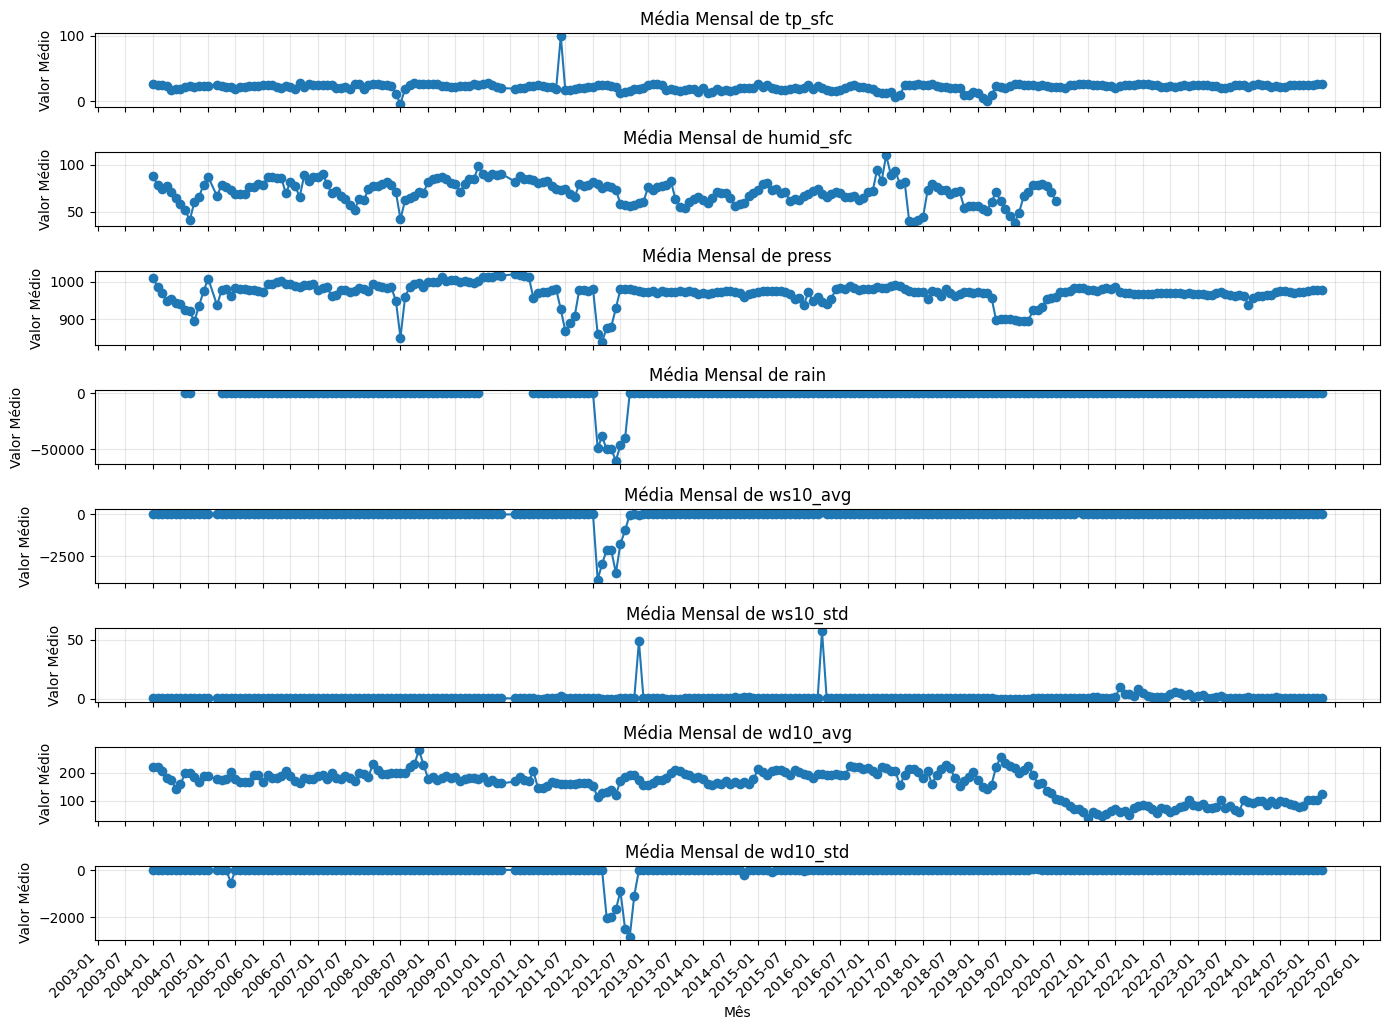

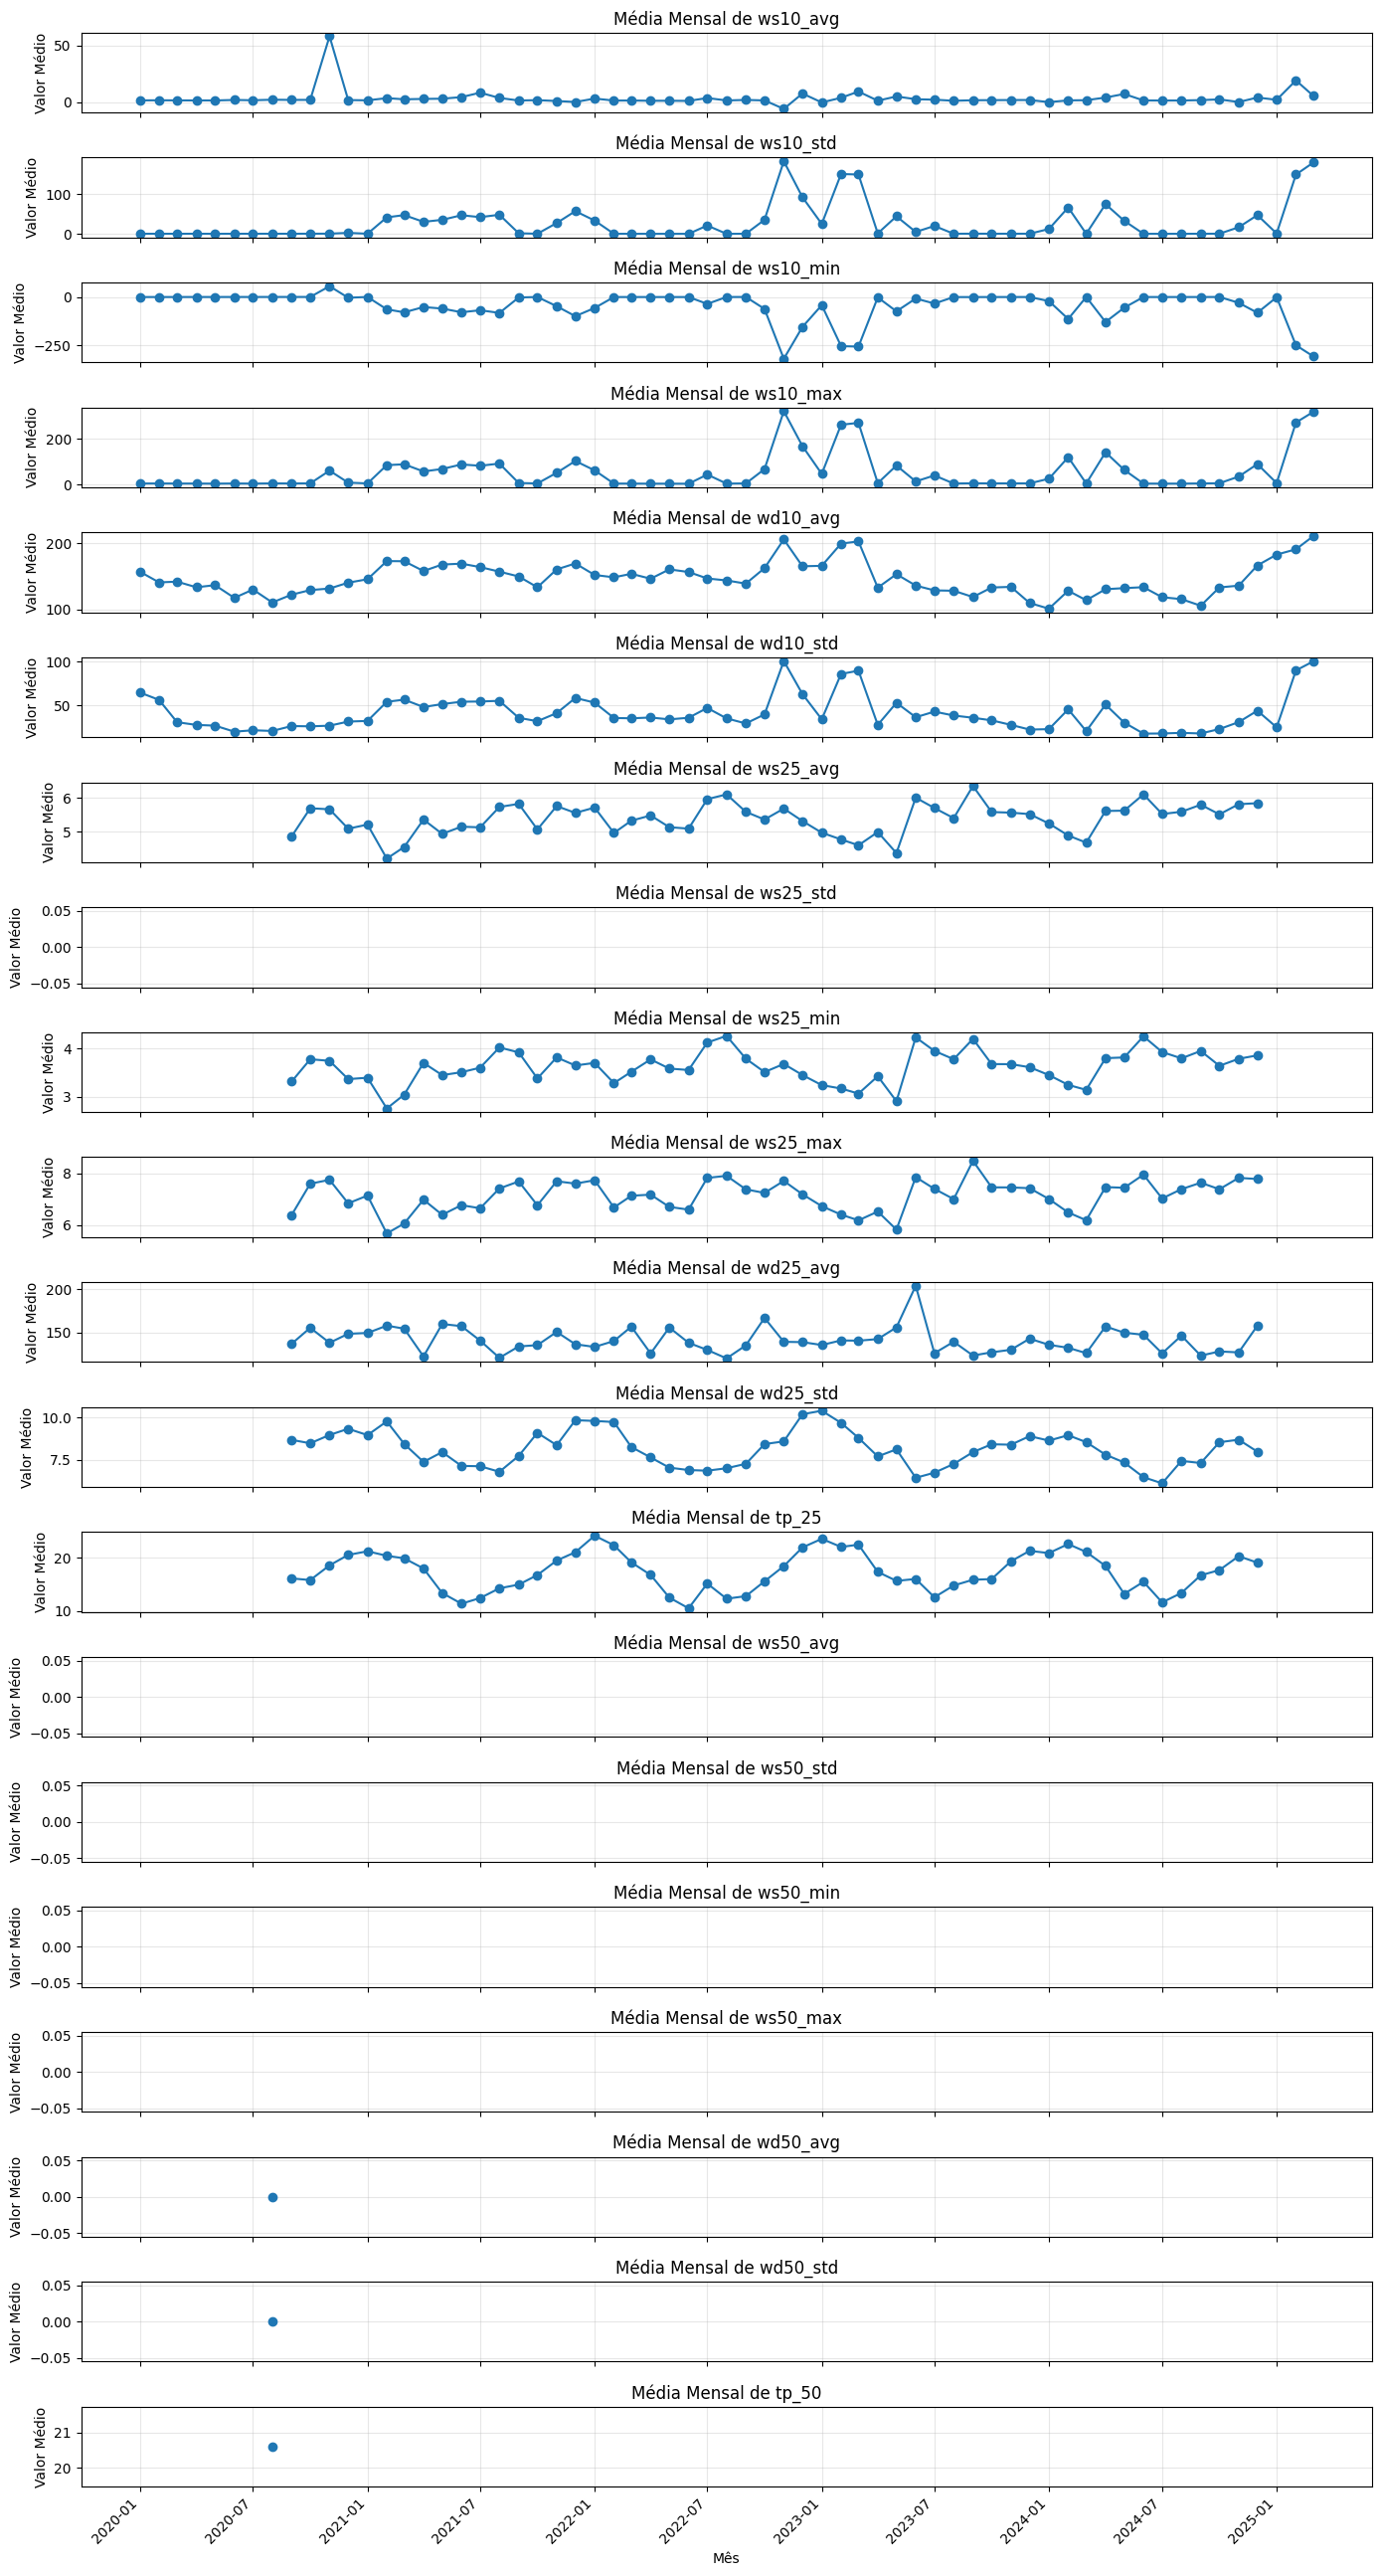

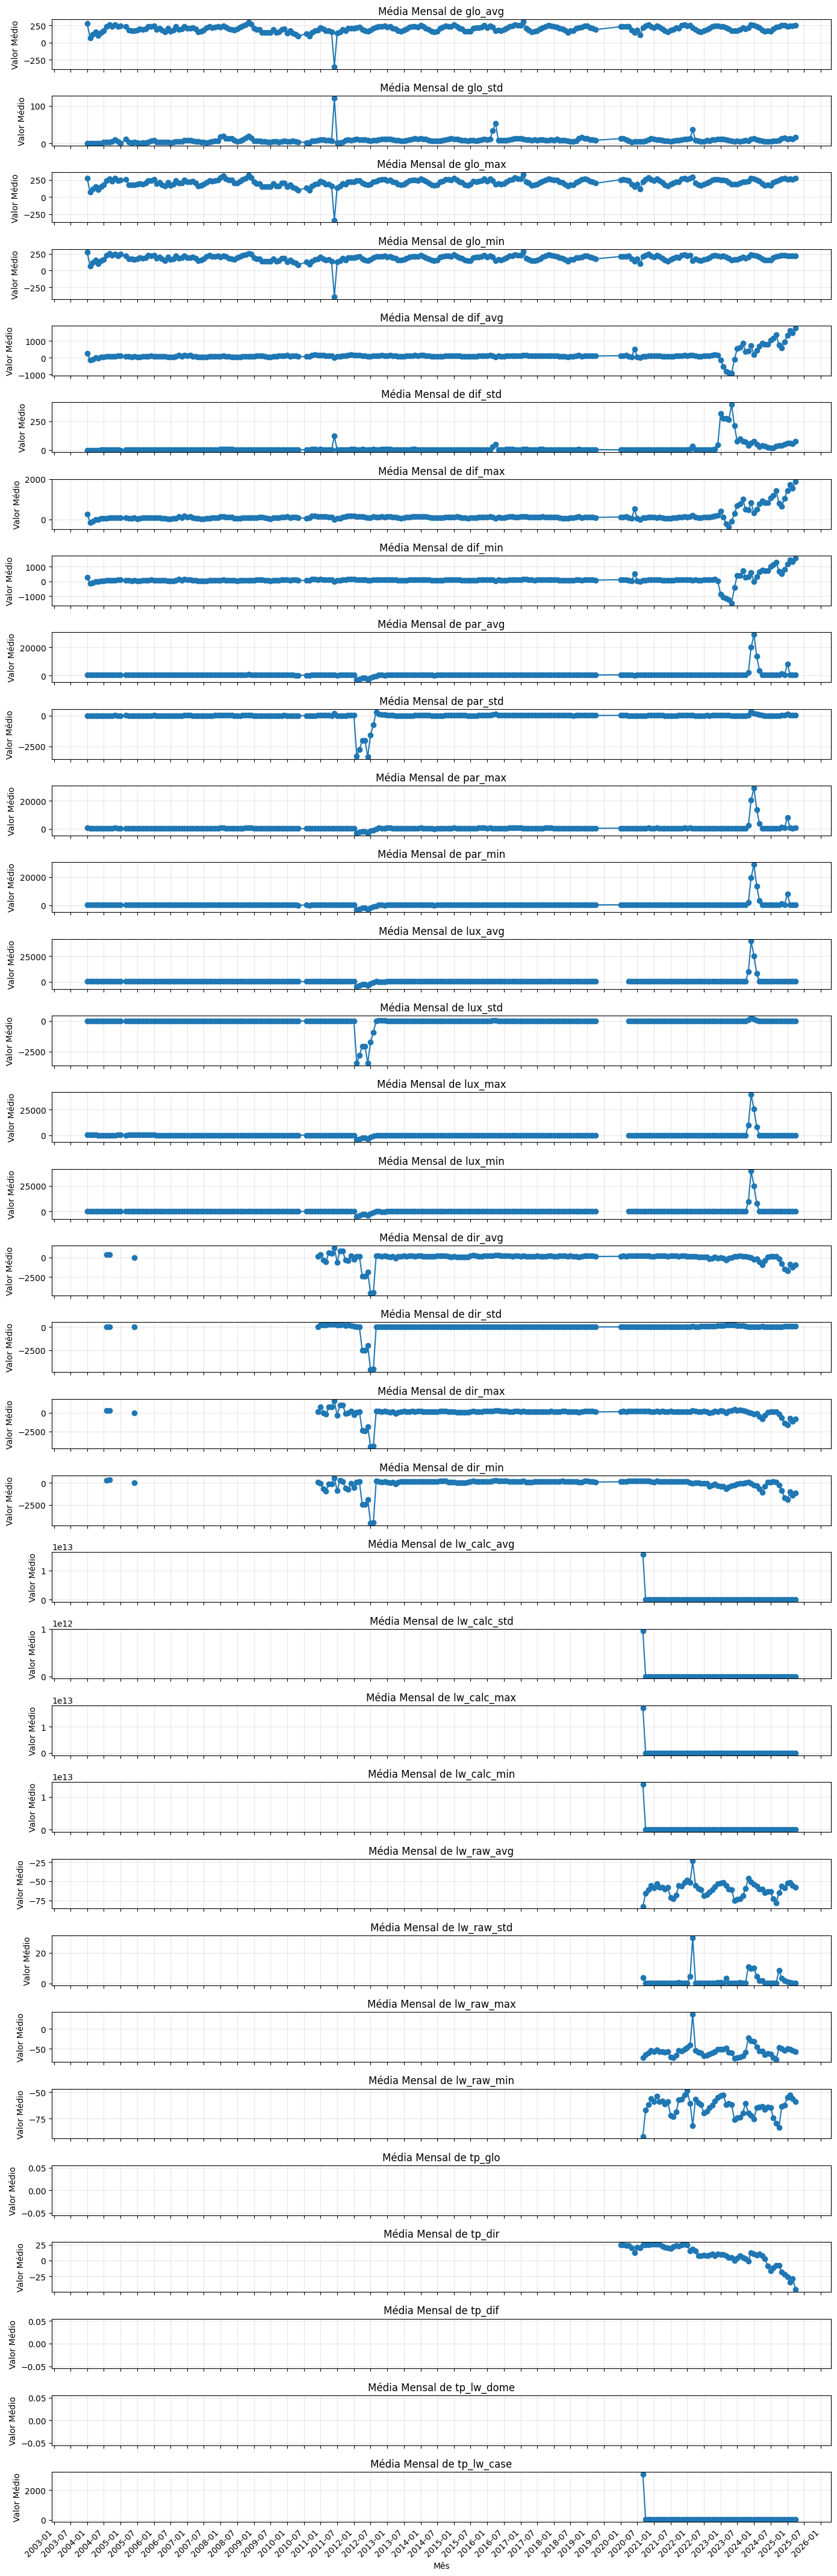

In [61]:
# Chama a função para analisar os dados meteorológicos
analise_temporal_mensal_multivariada(BASE_METEOROLOGICO, colunas_meteoro, con)

# Chama a função para analisar os dados anemométricos
analise_temporal_mensal_multivariada(BASE_ANEMOMETRICO, colunas_anemo, con)

# Chama a função para analisar os dados solarimétricos
analise_temporal_mensal_multivariada(BASE_SOLARIMETRICA, colunas_solar, con)